## Importing Data

In [355]:
import pandas as pd

Customize dataframe display:

In [356]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [357]:
import matplotlib.pyplot as plt

In [358]:
import numpy as np

In [442]:
import seaborn as sns

In [359]:
df = pd.read_csv('/Users/asamra/dev/Project2_Titanic/titanic/train.csv')

In [360]:
df

PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000             C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.00      0      0              373450    8.0500              NaN        S
5              6         0       3                                   Moran, Mr. James    male    NaN      0      0              330877    8.4583              NaN        Q
6              7         0       1                            McCarthy, Mr. Timothy J    male  54.00      0      0               17463   51.8625              E46        S
7              8         0       3                     Palsson, Master. Gosta Leonard    male   2.00      3      1              349909   21.0750              NaN        S
8              9         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0      2              347742   11.1333              NaN        S
9             10         1       2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1      0              237736   30.0708              NaN        C
10            11         1       3                    Sandstrom, Miss. Marguerite Rut  female   4.00      1      1             PP 9549   16.7000               G6        S
11            12         1       1                           Bonnell, Miss. Elizabeth  female  58.00      0      0              113783   26.5500             C103        S
12            13         0       3                     Saundercock, Mr. William Henry    male  20.00      0      0           A/5. 2151    8.0500              NaN        S
13            14         0       3                        Andersson, Mr. Anders Johan    male  39.00      1      5              347082   31.2750              NaN        S
14            15         0       3               Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0              350406    7.8542              NaN        S
15            16         1       2                   Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0      0              248706   16.0000              NaN        S
16            17         0       3                               Rice, Master. Eugene    male   2.00      4      1              382652   29.1250              NaN        Q
17            18         1       2                       Williams, Mr. Charles Eugene    male    NaN      0      0              244373   13.0000              NaN        S
18            19         0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.00      1      0              345763   18.0000              NaN        S
19            20         1       3                            Masselmani, Mrs. Fatima  female    NaN      0      0                2649    7.2250              NaN        C
20            21         0       2                               Fynney, Mr. Joseph J    male  35.00      0      0              239865   26.0000              NaN        S
21            22         1       2                              Beesley, Mr. Lawrence    male  34.00      0      0              248698   13.0000              D56        S
22            23         1       3                        McGowan, Miss.

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fianc√©s were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.shape shows rows and columns in tuple:

In [362]:
df.shape

(891, 12)

## Cleaning Data

df.isnull().sum() counts the number of nulls in each column: 

In [363]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**687 observations in the Cabin column are missing and the Ticket column doesn't provide any information on socio-economic status. So, I've decided to drop both columns.**

df.drop(['column5'], axis = 1) removes the 5th column where axis refers to column (row would be axis = 0) 0 & 1 refer to the df.shape tuple: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [364]:
df = df.drop(['Ticket','Cabin'], axis = 1)

Note how we only see 10 columns now instead of the original 12:

In [365]:
df.shape

(891, 10)

df.dropna() drops rows where at least 1 is missing: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Below, note how we now have 712 rows, down from 891:

In [366]:
df = df.dropna()

In [367]:
df.shape

(712, 10)

## Final Data Frame

In [368]:
df

PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch      Fare Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.00      1      0    7.2500        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1      0   71.2833        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.00      0      0    7.9250        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0   53.1000        S
4              5         0       3                           Allen, Mr. William Henry    male  35.00      0      0    8.0500        S
6              7         0       1                            McCarthy, Mr. Timothy J    male  54.00      0      0   51.8625        S
7              8         0       3                     Palsson, Master. Gosta Leonard    male   2.00      3      1   21.0750        S
8              9         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0      2   11.1333        S
9             10         1       2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1      0   30.0708        C
10            11         1       3                    Sandstrom, Miss. Marguerite Rut  female   4.00      1      1   16.7000        S
11            12         1       1                           Bonnell, Miss. Elizabeth  female  58.00      0      0   26.5500        S
12            13         0       3                     Saundercock, Mr. William Henry    male  20.00      0      0    8.0500        S
13            14         0       3                        Andersson, Mr. Anders Johan    male  39.00      1      5   31.2750        S
14            15         0       3               Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0    7.8542        S
15            16         1       2                   Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0      0   16.0000        S
16            17         0       3                               Rice, Master. Eugene    male   2.00      4      1   29.1250        Q
18            19         0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.00      1      0   18.0000        S
20            21         0       2                               Fynney, Mr. Joseph J    male  35.00      0      0   26.0000        S
21            22         1       2                              Beesley, Mr. Lawrence    male  34.00      0      0   13.0000        S
22            23         1       3                        McGowan, Miss. Anna "Annie"  female  15.00      0      0    8.0292        Q
23            24         1       1                       Sloper, Mr. William Thompson    male  28.00      0      0   35.5000        S
24            25         0       3                      Palsson, Miss. Torborg Danira  female   8.00      3      1   21.0750        S
25            26         1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.00      1      5   31.3875        S
27            28         0       1                     Fortune, Mr. Charles Alexander    male  19.00      3      2  263.0000        S
30            31         0       1                           Uruchurtu, Don. Manuel E    male  40.00      0      0   27.7208        C
33            34         0       2                              Wheadon, Mr. Edward H    male  66.00      0      0   10.5000        S
34            35         0       1                            Meyer, Mr. Edgar Joseph    male  28.00      1      0   82.1708        C
35            36         0       1                     Holverson, Mr. Alexander Oskar    male  42.00      1      0   52.0000        S
37            38         0       3                           Cann, Mr. Ernest Charles    male  21.00      0      0    8

## Summary Statistics

Summary statistics for all columns:

In [369]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   712.000000  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean    448.589888    0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std     258.683191    0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     222.750000    0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%     445.000000    0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%     677.250000    1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max     891.000000    1.000000    3.000000   80.000000    5.000000    6.000000  512.329200

Summary statistics for single column:

In [370]:
pd.DataFrame(df.Age.describe())

Age
count  712.000000
mean    29.642093
std     14.492933
min      0.420000
25%     20.000000
50%     28.000000
75%     38.000000
max     80.000000

Why doesn't the following show the same info as the Pandas Intro file?:http://localhost:8890/notebooks/dev/DE-Pandas-Intro-nb/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/notebook.ipynb

In [371]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

df.corr() shows correlation for all columns:

Note, this only makes sense for continuous variables. The correlation between Pclass and Age means nothing in this form since Pclass is a categorical variable.

In [372]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.029526 -0.035609  0.033681 -0.082704 -0.011672  0.009655
Survived        0.029526  1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100
Pclass         -0.035609 -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age             0.033681 -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp          -0.082704 -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860
Parch          -0.011672  0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624
Fare            0.009655  0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000

## Analysis: Segmentation via value_counts

df['column'].value_counts() gives us a frequency of all values in a column:

In [373]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [374]:
df['Survived'].value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

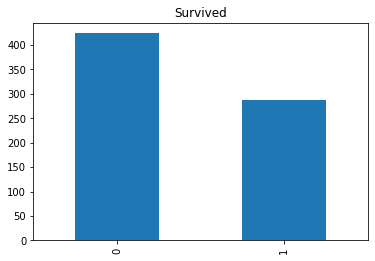

In [436]:
df['Survived'].value_counts().plot(kind='bar', title = 'Survived')

In [375]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [376]:
df['Pclass'].value_counts(normalize=True) * 100

3    49.859551
1    25.842697
2    24.297753
Name: Pclass, dtype: float64

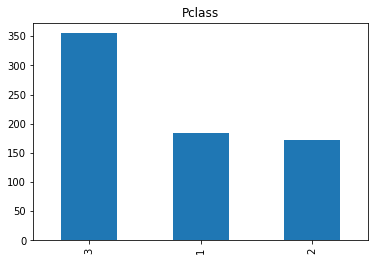

In [437]:
df['Pclass'].value_counts().plot(kind='bar', title = 'Pclass')

In [377]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [378]:
df['Sex'].value_counts(normalize=True) * 100

male      63.623596
female    36.376404
Name: Sex, dtype: float64

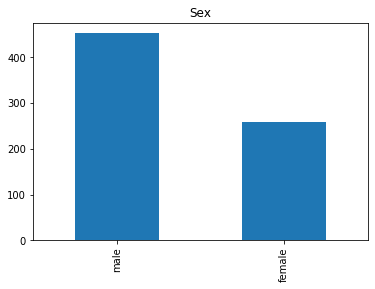

In [438]:
df['Sex'].value_counts().plot(kind='bar', title = 'Sex')

In [379]:
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [439]:
df['Embarked'].value_counts(normalize=True)*100

S    77.808989
C    18.258427
Q     3.932584
Name: Embarked, dtype: float64

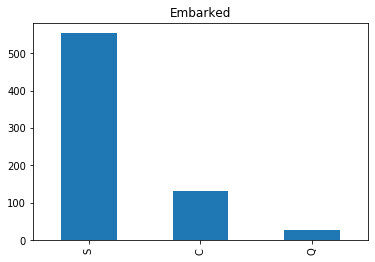

In [440]:
df['Embarked'].value_counts().plot(kind='bar', title = 'Embarked')

## Analysis: Survival and Passenger Class

In [380]:
survived_pclass = df[['Survived','Pclass']]

In [449]:
survived_pclass

Survived  Pclass
0           0       3
1           1       1
2           1       3
3           1       1
4           0       3
6           0       1
7           0       3
8           1       3
9           1       2
10          1       3
11          1       1
12          0       3
13          0       3
14          0       3
15          1       2
16          0       3
18          0       3
20          0       2
21          1       2
22          1       3
23          1       1
24          0       3
25          1       3
27          0       1
30          0       1
33          0       2
34          0       1
35          0       1
37          0       3
38          0       3
39          1       3
40          0       3
41          0       2
43          1       2
44          1       3
49          0       3
50          0       3
51          0       3
52          1       1
53          1       2
54          0       1
56          1       2
57          0       3
58          1       2
59          0       3
60          0       3
62          0       1
63          0       3
66          1       2
67          0       3
68          1       3
69          0       3
70          0       2
71          0       3
72          0       2
73          0       3
74          1       3
75          0       3
78          1       2
79          1       3
80          0       3
81          1       3
83          0       1
84          1       2
85          1       3
86          0       3
88          1       1
89          0       3
90          0       3
91          0       3
92          0       1
93          0       3
94          0       3
96          0       1
97          1       1
98          1       2
99          0       2
100         0       3
102         0       1
103         0       3
104         0       3
105         0       3
106         1       3
108         0       3
110         0       1
111         0       3
112         0       3
113         0       3
114         0       3
115         0       3
116         0       3
117         0       2
118         0       1
119         0       3
120         0       2
122         0       2
123         1       2
124         0       1
125         1       3
127         1       3
129         0       3
130         0       3
131         0       3
132         0       3
133         1       2
134         0       2
135         0       2
136         1       1
137         0       1
138         0       3
139         0       1
141         1       3
142         1       3
143         0       3
144         0       2
145         0       2
146         1       3
147         0       3
148         0       2
149         0       2
150         0       2
151         1       1
152         0       3
153         0       3
155         0       1
156         1       3
157         0       3
160         0       3
161         1       2
162         0       3
163         0       3
164         0       3
165         1       3
167         0       3
169         0       3
170         0       1
171         0       3
172         1       3
173         0       3
174         0       1
175         0       3
177         0       1
178         0       2
179         0       3
182         0       3
183         1       2
184         1       3
187         1       1
188         0       3
189         0       3
190         1       2
191         0       2
192         1       3
193         1       2
194         1       1
195         1       1
197         0       3
199         0       2
200         0       3
202         0       3
203         0       3
204         1       3
205         0       3
206         0       3
207         1       3
208         1       3
209         1       1
210         0       3
211         1       2
212         0       3
213         0       2
215         1       1
216         1       3
217         0       2
218         1       1
219         0       2
220         1       3
221         0       2
222         0       3
224         1       1
225         0       3
2

In [382]:
survived_pclass.shape

(712, 2)

In [383]:
survived_pclass.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          64
          2          90
          3         270
1         1         120
          2          83
          3          85
dtype: int64

## Analysis: Survival and Gender

In [385]:
survived_sex = df[['Survived','Sex']]

In [386]:
survived_sex

Survived     Sex
0           0    male
1           1  female
2           1  female
3           1  female
4           0    male
6           0    male
7           0    male
8           1  female
9           1  female
10          1  female
11          1  female
12          0    male
13          0    male
14          0  female
15          1  female
16          0    male
18          0  female
20          0    male
21          1    male
22          1  female
23          1    male
24          0  female
25          1  female
27          0    male
30          0    male
33          0    male
34          0    male
35          0    male
37          0    male
38          0  female
39          1  female
40          0  female
41          0  female
43          1  female
44          1  female
49          0  female
50          0    male
51          0    male
52          1  female
53          1  female
54          0    male
56          1  female
57          0    male
58          1  female
59          0    male
60          0    male
62          0    male
63          0    male
66          1  female
67          0    male
68          1  female
69          0    male
70          0    male
71          0  female
72          0    male
73          0    male
74          1    male
75          0    male
78          1    male
79          1  female
80          0    male
81          1    male
83          0    male
84          1  female
85          1  female
86          0    male
88          1  female
89          0    male
90          0    male
91          0    male
92          0    male
93          0    male
94          0    male
96          0    male
97          1    male
98          1  female
99          0    male
100         0  female
102         0    male
103         0    male
104         0    male
105         0    male
106         1  female
108         0    male
110         0    male
111         0  female
112         0    male
113         0  female
114         0  female
115         0    male
116         0    male
117         0    male
118         0    male
119         0  female
120         0    male
122         0    male
123         1  female
124         0    male
125         1    male
127         1    male
129         0    male
130         0    male
131         0    male
132         0  female
133         1  female
134         0    male
135         0    male
136         1  female
137         0    male
138         0    male
139         0    male
141         1  female
142         1  female
143         0    male
144         0    male
145         0    male
146         1    male
147         0  female
148         0    male
149         0    male
150         0    male
151         1  female
152         0    male
153         0    male
155         0    male
156         1  female
157         0    male
160         0    male
161         1  female
162         0    male
163         0    male
164         0    male
165         1    male
167         0  female
169         0    male
170         0    male
171         0    male
172         1  female
173         0    male
174         0    male
175         0    male
177         0  female
178         0    male
179         0    male
182         0    male
183         1    male
184         1  female
187         1    male
188         0    male
189         0    male
190         1  female
191         0    male
192         1  female
193         1    male
194         1  female
195         1  female
197         0    male
199         0  female
200         0    male
202         0    male
203         0    male
204         1    male
205         0  female
206         0    male
207         1    male
208         1  female
209         1    male
210         0    male
211         1  female
212         0    male
213         0    male
215         1  female
216         1  female
217         0    male
218         1  female
219         0    male
220         1    male
221         0    male
222         0    male
224         1    male
225         0    male
2

In [387]:
survived_sex.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     64
          male      360
1         female    195
          male       93
dtype: int64

In [421]:
df_fem = df.Sex.str.match('female')

In [422]:
df_fem = df[df_fem]

In [423]:
survived_fem = df_fem[['Survived','Sex']]

In [424]:
survived_fem

Survived     Sex
1           1  female
2           1  female
3           1  female
8           1  female
9           1  female
10          1  female
11          1  female
14          0  female
15          1  female
18          0  female
22          1  female
24          0  female
25          1  female
38          0  female
39          1  female
40          0  female
41          0  female
43          1  female
44          1  female
49          0  female
52          1  female
53          1  female
56          1  female
58          1  female
66          1  female
68          1  female
71          0  female
79          1  female
84          1  female
85          1  female
88          1  female
98          1  female
100         0  female
106         1  female
111         0  female
113         0  female
114         0  female
119         0  female
123         1  female
132         0  female
133         1  female
136         1  female
141         1  female
142         1  female
147         0  female
151         1  female
156         1  female
161         1  female
167         0  female
172         1  female
177         0  female
184         1  female
190         1  female
192         1  female
194         1  female
195         1  female
199         0  female
205         0  female
208         1  female
211         1  female
215         1  female
216         1  female
218         1  female
230         1  female
233         1  female
237         1  female
246         0  female
247         1  female
251         0  female
254         0  female
255         1  female
257         1  female
258         1  female
259         1  female
268         1  female
269         1  female
272         1  female
275         1  female
276         0  female
279         1  female
289         1  female
290         1  female
291         1  female
293         0  female
297         0  female
299         1  female
307         1  female
309         1  female
310         1  female
311         1  female
312         0  female
315         1  female
316         1  female
318         1  female
319         1  female
322         1  female
323         1  female
325         1  female
327         1  female
328         1  female
329         1  female
337         1  female
341         1  female
345         1  female
346         1  female
356         1  female
357         0  female
362         0  female
366         1  female
369         1  female
374         0  female
376         1  female
380         1  female
381         1  female
383         1  female
387         1  female
389         1  female
393         1  female
394         1  female
396         0  female
399         1  female
402         0  female
404         0  female
412         1  female
416         1  female
417         1  female
419         0  female
423         0  female
426         1  female
427         1  female
432         1  female
435         1  female
436         0  female
437         1  female
440         1  female
443         1  female
446         1  female
448         1  female
458         1  female
469         1  female
472         1  female
473         1  female
474         0  female
479         1  female
483         1  female
486         1  female
496         1  female
498         0  female
501         0  female
503         0  female
504         1  female
506         1  female
513         1  female
516         1  female
518         1  female
520         1  female
523         1  female
526         1  female
530         1  female
534         0  female
535         1  female
537         1  female
539         1  female
540         1  female
541         0  female
542         0  female
546         1  female
554         1  female
556         1  female
558         1  female
559         1  female
567         0  female
571         1  female
576         1  female
577         1  female
580         1  female
581         1  female
585         1  female
591         1  female
600         1  female
608         1  female
6

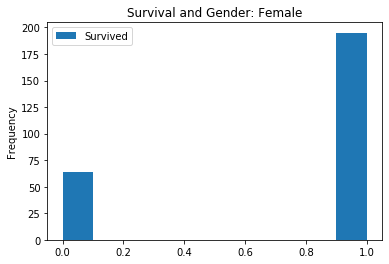

In [425]:
survived_fem.plot(kind='hist', title='Survival and Gender: Female')

In [417]:
df_male = df.Sex.str.match('male')

In [418]:
df_male = df[df_male]

In [419]:
survived_male = df_male[['Survived','Sex']]

In [420]:
survived_male

Survived   Sex
0           0  male
4           0  male
6           0  male
7           0  male
12          0  male
13          0  male
16          0  male
20          0  male
21          1  male
23          1  male
27          0  male
30          0  male
33          0  male
34          0  male
35          0  male
37          0  male
50          0  male
51          0  male
54          0  male
57          0  male
59          0  male
60          0  male
62          0  male
63          0  male
67          0  male
69          0  male
70          0  male
72          0  male
73          0  male
74          1  male
75          0  male
78          1  male
80          0  male
81          1  male
83          0  male
86          0  male
89          0  male
90          0  male
91          0  male
92          0  male
93          0  male
94          0  male
96          0  male
97          1  male
99          0  male
102         0  male
103         0  male
104         0  male
105         0  male
108         0  male
110         0  male
112         0  male
115         0  male
116         0  male
117         0  male
118         0  male
120         0  male
122         0  male
124         0  male
125         1  male
127         1  male
129         0  male
130         0  male
131         0  male
134         0  male
135         0  male
137         0  male
138         0  male
139         0  male
143         0  male
144         0  male
145         0  male
146         1  male
148         0  male
149         0  male
150         0  male
152         0  male
153         0  male
155         0  male
157         0  male
160         0  male
162         0  male
163         0  male
164         0  male
165         1  male
169         0  male
170         0  male
171         0  male
173         0  male
174         0  male
175         0  male
178         0  male
179         0  male
182         0  male
183         1  male
187         1  male
188         0  male
189         0  male
191         0  male
193         1  male
197         0  male
200         0  male
202         0  male
203         0  male
204         1  male
206         0  male
207         1  male
209         1  male
210         0  male
212         0  male
213         0  male
217         0  male
219         0  male
220         1  male
221         0  male
222         0  male
224         1  male
225         0  male
226         1  male
227         0  male
228         0  male
231         0  male
232         0  male
234         0  male
236         0  male
238         0  male
239         0  male
242         0  male
243         0  male
244         0  male
245         0  male
248         1  male
249         0  male
252         0  male
253         0  male
261         1  male
262         0  male
263         0  male
265         0  male
266         0  male
267         1  male
271         1  male
273         0  male
278         0  male
280         0  male
281         0  male
282         0  male
283         1  male
285         0  male
286         1  male
287         0  male
288         1  male
292         0  male
294         0  male
296         0  male
302         0  male
305         1  male
308         0  male
313         0  male
314         0  male
317         0  male
320         0  male
321         0  male
326         0  male
331         0  male
332         0  male
333         0  male
336         0  male
338         1  male
339         0  male
340         1  male
342         0  male
343         0  male
344         0  male
348         1  male
349         0  male
350         0  male
352         0  male
353         0  male
355         0  male
360         0  male
361         0  male
363         0  male
365         0  male
370         1  male
371         0  male
372         0  male
373         0  male
377         0  male
378         0  male
379         0  male
382         0  male
385         0  male
386         0  male
390         1  male
391         1  male
392         0  male
395         0  male
397         0  male
398  

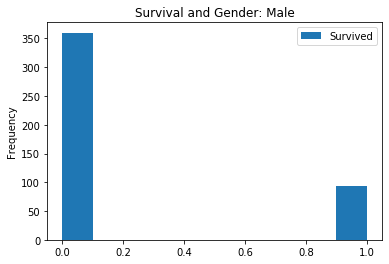

In [426]:
survived_male.plot(kind='hist', title='Survival and Gender: Male')